In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import sklearn.metrics as metrics
import math




In [3]:
sample_submission=pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
test=pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
train=pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
c_test=test.copy()
c_train=train.copy()


In [4]:
c_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
c_train['train']=1
c_test['train']=0
df=pd.concat([c_train,c_test],axis=0,sort=False)


In [6]:
df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,0
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,0
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,0
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,0


In [7]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
train               0
Length: 82, dtype: int64

In [8]:

NAN = [(c, df[c].isna().mean()*100) for c in df]
NAN=pd.DataFrame(NAN,columns=["column_name","percentage"])


In [9]:
NAN=NAN[50<NAN.percentage]
NAN.sort_values("percentage",ascending=False)

,column_name,percentage
72,PoolQC,99.657417
74,MiscFeature,96.402878
6,Alley,93.216855
73,Fence,80.438506


In [10]:
df=df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)


In [11]:
object_columns=df.select_dtypes(include=['object'])
numerical_columns=df.select_dtypes(exclude=['object'])


In [12]:
object_columns.dtypes

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [13]:
object_columns.isnull().sum()

MSZoning            4
Street              0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
SaleType            1
SaleCondition       0
dtype: int64

In [14]:
columns_none=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','FireplaceQu','GarageCond']
object_columns[columns_none]=object_columns[columns_none].fillna('None')


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3062: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [15]:
columns_with_lowNA = ['MSZoning','Utilities','Exterior1st','Exterior2nd','MasVnrType','Electrical','KitchenQual','Functional','SaleType']
#fill missing values for each column (using its own most frequent value)
object_columns[columns_with_lowNA] = object_columns[columns_with_lowNA].fillna(object_columns.mode().iloc[0])

In [16]:
print((numerical_columns['YrSold']-numerical_columns['YearBuilt']).median())
print(numerical_columns["LotFrontage"].median())

35.0
68.0


In [17]:
numerical_columns['GarageYrBlt'] = numerical_columns['GarageYrBlt'].fillna(numerical_columns['YrSold']-35)
numerical_columns['LotFrontage'] = numerical_columns['LotFrontage'].fillna(68)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
numerical_columns= numerical_columns.fillna(0)

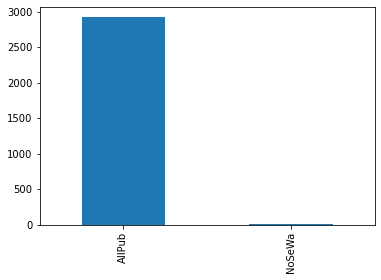

In [19]:
object_columns['Utilities'].value_counts().plot(kind='bar')

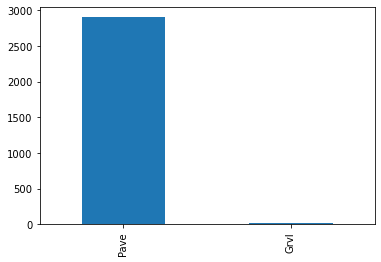

In [20]:
object_columns['Street'].value_counts().plot(kind='bar')

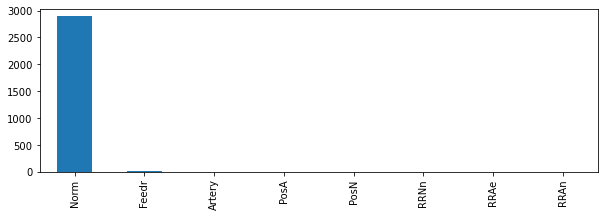

In [21]:
object_columns['Condition2'].value_counts().plot(kind='bar',figsize=[10,3])

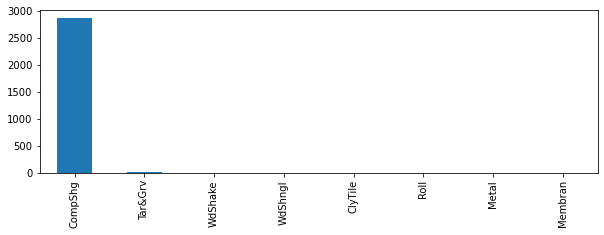

In [22]:
object_columns['RoofMatl'].value_counts().plot(kind='bar',figsize=[10,3])

In [23]:
object_columns = object_columns.drop(['Heating','RoofMatl','Condition2','Street','Utilities'],axis=1)

In [24]:
numerical_columns['Age_House']=(numerical_columns['YrSold']-numerical_columns['YearBuilt'])
numerical_columns['Age_House'].describe()

count    2919.000000
mean       36.479959
std        30.336182
min        -1.000000
25%         7.000000
50%        35.000000
75%        54.500000
max       136.000000
Name: Age_House, dtype: float64

In [25]:
Negatif = numerical_columns[numerical_columns['Age_House'] < 0]
Negatif

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train,Age_House
1089,2550,20,128.0,39290,10,5,2008,2009,1224.0,4010.0,...,0,0,0,0,17000,10,2007,0.0,0,-1


In [26]:
numerical_columns.loc[numerical_columns['YrSold'] < numerical_columns['YearBuilt'],'YrSold' ] = 2009
numerical_columns['Age_House']= (numerical_columns['YrSold']-numerical_columns['YearBuilt'])
numerical_columns['Age_House'].describe()

count    2919.000000
mean       36.480644
std        30.335358
min         0.000000
25%         7.000000
50%        35.000000
75%        54.500000
max       136.000000
Name: Age_House, dtype: float64

In [27]:
numerical_columns['TotalBsmtBath'] = numerical_columns['BsmtFullBath'] + numerical_columns['BsmtFullBath']*0.5
numerical_columns['TotalBath'] = numerical_columns['FullBath'] + numerical_columns['HalfBath']*0.5 
numerical_columns['TotalSA']=numerical_columns['TotalBsmtSF'] + numerical_columns['1stFlrSF'] + numerical_columns['2ndFlrSF']

In [28]:
numerical_columns.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train,Age_House,TotalBsmtBath,TotalBath,TotalSA
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,2,2008,208500.0,1,5,1.5,2.5,2566.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,5,2007,181500.0,1,31,0.0,2.0,2524.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,9,2008,223500.0,1,7,1.5,2.5,2706.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,2,2006,140000.0,1,91,1.5,1.0,2473.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,12,2008,250000.0,1,8,1.5,2.5,3343.0


In [29]:
bin_map  = {'TA':2,'Gd':3, 'Fa':1,'Ex':4,'Po':1,'None':0,'Y':1,'N':0,'Reg':3,'IR1':2,'IR2':1,'IR3':0,"None" : 0,
            "No" : 2, "Mn" : 2, "Av": 3,"Gd" : 4,"Unf" : 1, "LwQ": 2, "Rec" : 3,"BLQ" : 4, "ALQ" : 5, "GLQ" : 6
            }
object_columns['ExterQual'] = object_columns['ExterQual'].map(bin_map)
object_columns['ExterCond'] = object_columns['ExterCond'].map(bin_map)
object_columns['BsmtCond'] = object_columns['BsmtCond'].map(bin_map)
object_columns['BsmtQual'] = object_columns['BsmtQual'].map(bin_map)
object_columns['HeatingQC'] = object_columns['HeatingQC'].map(bin_map)
object_columns['KitchenQual'] = object_columns['KitchenQual'].map(bin_map)
object_columns['FireplaceQu'] = object_columns['FireplaceQu'].map(bin_map)
object_columns['GarageQual'] = object_columns['GarageQual'].map(bin_map)
object_columns['GarageCond'] = object_columns['GarageCond'].map(bin_map)

object_columns['CentralAir'] = object_columns['CentralAir'].map(bin_map)
object_columns['LotShape'] = object_columns['LotShape'].map(bin_map)
object_columns['BsmtExposure'] = object_columns['BsmtExposure'].map(bin_map)
object_columns['BsmtFinType1'] = object_columns['BsmtFinType1'].map(bin_map)
object_columns['BsmtFinType2'] = object_columns['BsmtFinType2'].map(bin_map)

PavedDrive =   {"N" : 0, "P" : 1, "Y" : 2}
object_columns['PavedDrive'] = object_columns['PavedDrive'].map(PavedDrive)

In [30]:
#Select categorical features
rest_object_columns = object_columns.select_dtypes(include=['object'])
#Using One hot encoder
object_columns= pd.get_dummies(object_columns, columns=rest_object_columns.columns) 

In [31]:
object_columns.head()

,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3,4,2,4,2,2,6,1,4,1,...,0,0,0,1,0,0,0,0,1,0
1,3,2,2,4,2,4,5,1,4,1,...,0,0,0,1,0,0,0,0,1,0
2,2,4,2,4,2,2,6,1,4,1,...,0,0,0,1,0,0,0,0,1,0
3,2,2,2,2,4,2,5,1,4,1,...,0,0,0,1,1,0,0,0,0,0
4,2,4,2,4,2,3,6,1,4,1,...,0,0,0,1,0,0,0,0,1,0


In [32]:
df_final = pd.concat([object_columns, numerical_columns], axis=1,sort=False)
df_final.head()

,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,...,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train,Age_House,TotalBsmtBath,TotalBath,TotalSA
0,3,4,2,4,2,2,6,1,4,1,...,0,0,2,2008,208500.0,1,5,1.5,2.5,2566.0
1,3,2,2,4,2,4,5,1,4,1,...,0,0,5,2007,181500.0,1,31,0.0,2.0,2524.0
2,2,4,2,4,2,2,6,1,4,1,...,0,0,9,2008,223500.0,1,7,1.5,2.5,2706.0
3,2,2,2,2,4,2,5,1,4,1,...,0,0,2,2006,140000.0,1,91,1.5,1.0,2473.0
4,2,4,2,4,2,3,6,1,4,1,...,0,0,12,2008,250000.0,1,8,1.5,2.5,3343.0


In [33]:
df_final = df_final.drop(['Id',],axis=1)

df_train = df_final[df_final['train'] == 1]
df_train = df_train.drop(['train',],axis=1)


df_test = df_final[df_final['train'] == 0]
df_test = df_test.drop(['SalePrice'],axis=1)
df_test = df_test.drop(['train',],axis=1)

In [34]:
target= df_train['SalePrice']
df_train = df_train.drop(['SalePrice'],axis=1)

In [35]:
x_train,x_test,y_train,y_test = train_test_split(df_train,target,test_size=0.33,random_state=0)


In [36]:
   xgb =XGBRegressor( booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=1.5, n_estimators=2400,
             n_jobs=1, nthread=None, objective='reg:linear',
             reg_alpha=0.6, reg_lambda=0.6, scale_pos_weight=1, 
             silent=None, subsample=0.8, verbosity=1)

    
lgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=12000, 
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.4, 
                                       )  

In [37]:
xgb.fit(x_train,y_train)
lgbm.fit(x_train,y_train,eval_metric='rmse')

[14:20:02] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[14:20:16] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


LGBMRegressor(bagging_fraction=0.75, bagging_freq=5, bagging_seed=7,
              feature_fraction=0.4, learning_rate=0.01, max_bin=200,
              n_estimators=12000, num_leaves=4, objective='regression')

In [38]:
predict1 = xgb.predict(x_test)
predict = lgbm.predict(x_test)


In [39]:

print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test, predict1))))
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test, predict))))



Root Mean Square Error test = 26089.30803984919
Root Mean Square Error test = 26726.198278903514


In [40]:
xgb.fit(df_train, target)
lgbm.fit(df_train, target,eval_metric='rmse')

[14:20:22] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[14:20:43] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


LGBMRegressor(bagging_fraction=0.75, bagging_freq=5, bagging_seed=7,
              feature_fraction=0.4, learning_rate=0.01, max_bin=200,
              n_estimators=12000, num_leaves=4, objective='regression')

In [41]:
predict4 = lgbm.predict(df_test)
predict3 = xgb.predict(df_test)
predict_y = ( predict3*0.45 + predict4 * 0.55)

In [42]:
submission = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": predict_y
    })
submission.to_csv('submission.csv', index=False)